C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Logistic Regression Metrics: {'accuracy': 0.23988644428672817, 'precision': 0.22666666666666666, 'recall': 0.7727272727272727, 'f1_score': 0.35051546391752575, 'roc_auc': 0.37286031672220926}
Random Forest Metrics: {'accuracy': 0.7317246273953159, 'precision': 0.4090909090909091, 'recall': 0.02406417112299465, 'f1_score': 0.045454545454545456, 'roc_auc': 0.7217817561807331}
Decision Tree Metrics: {'accuracy': 0.552874378992193, 'precision': 0.36295503211991437, 'recall': 0.9064171122994652, 'f1_score': 0.518348623853211, 'roc_auc': 0.6657689426231626}
XGBoost Metrics: {'accuracy': 0.7345635202271115, 'precision': 0.0, 'recall': 0.0, 'f1_score': 0.0, 'roc_auc': 0.5322638146167558}


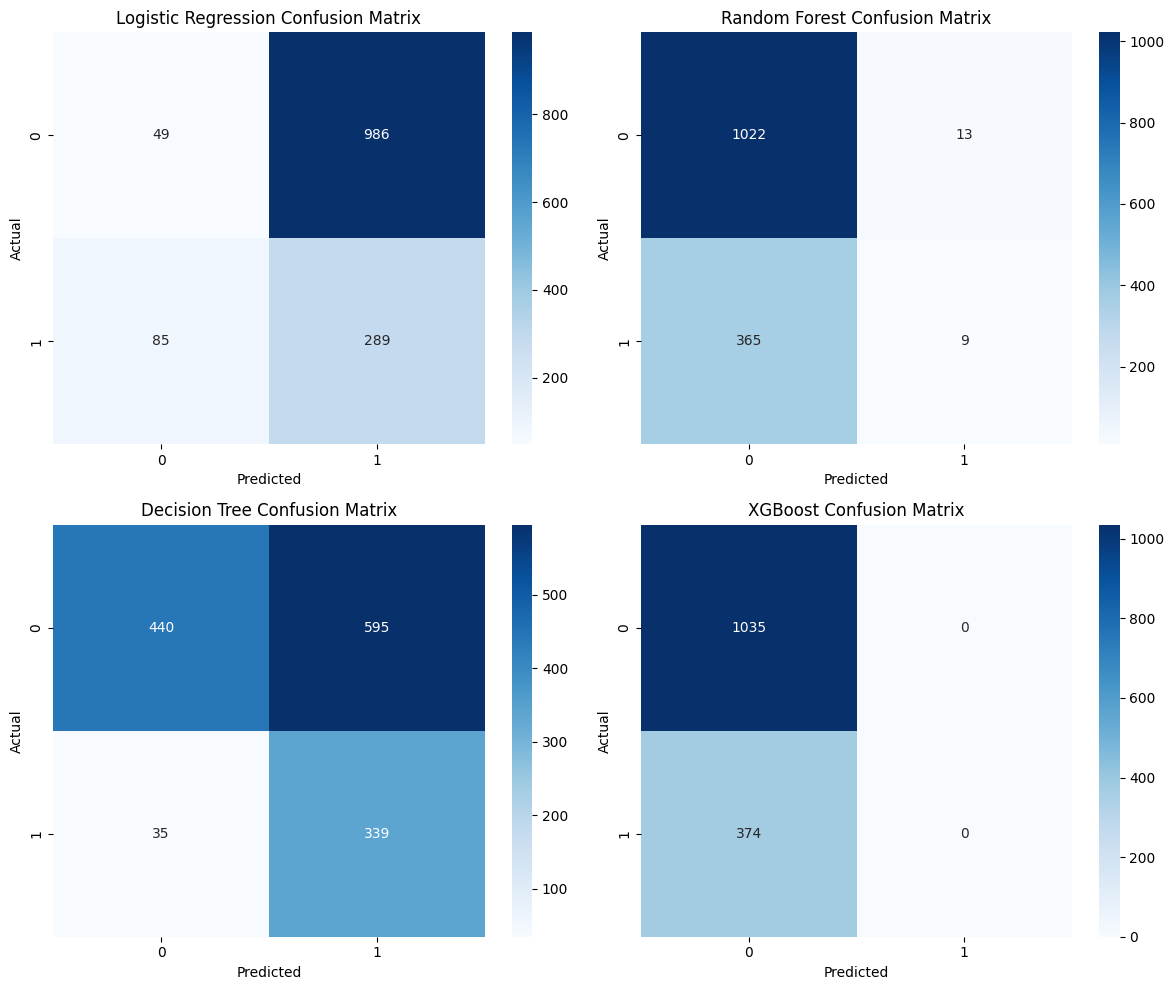

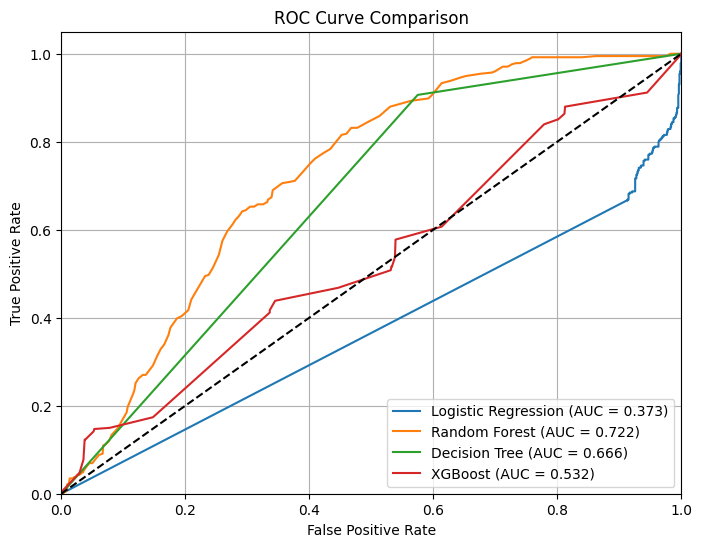

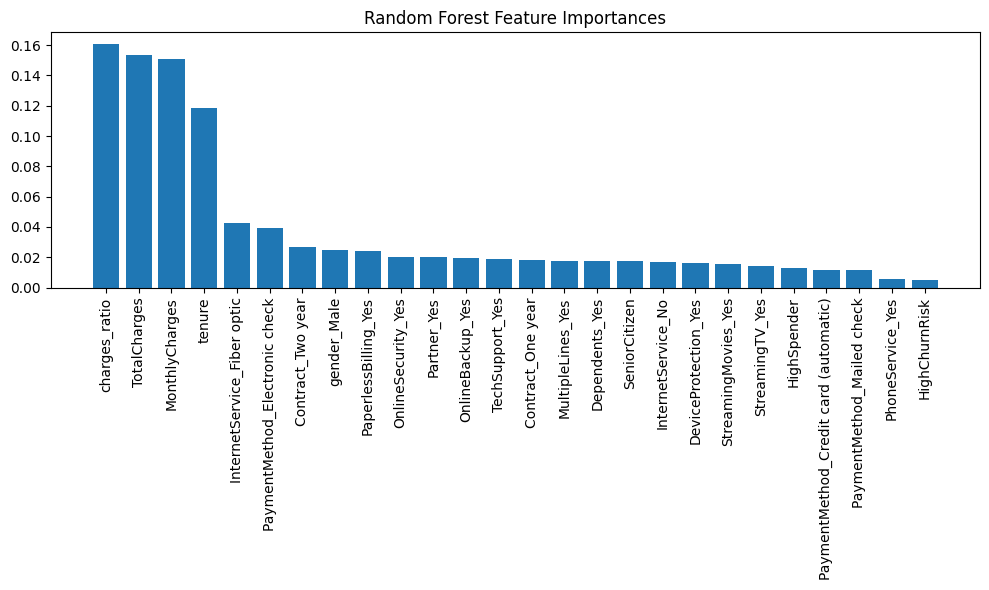

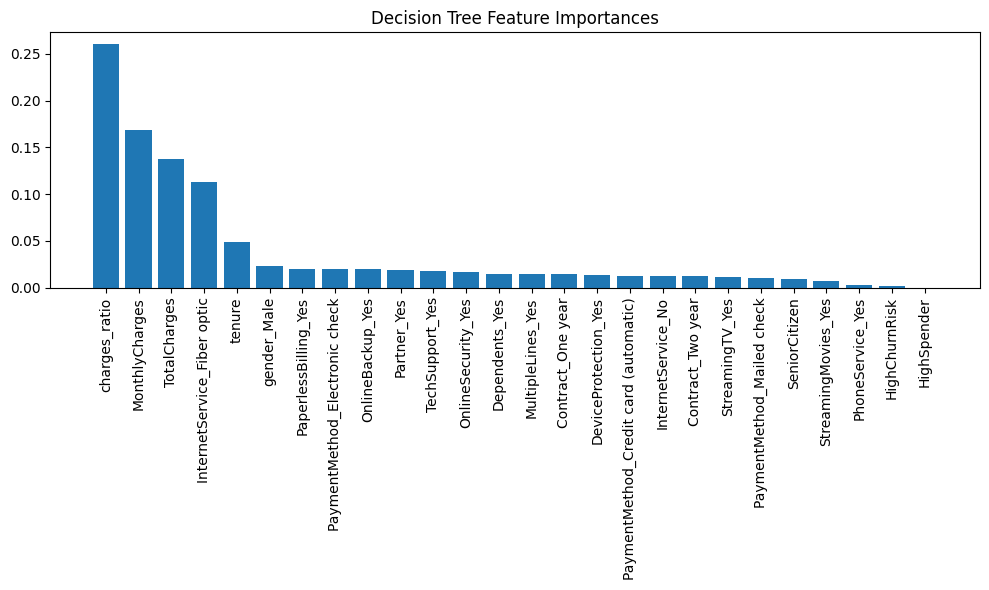

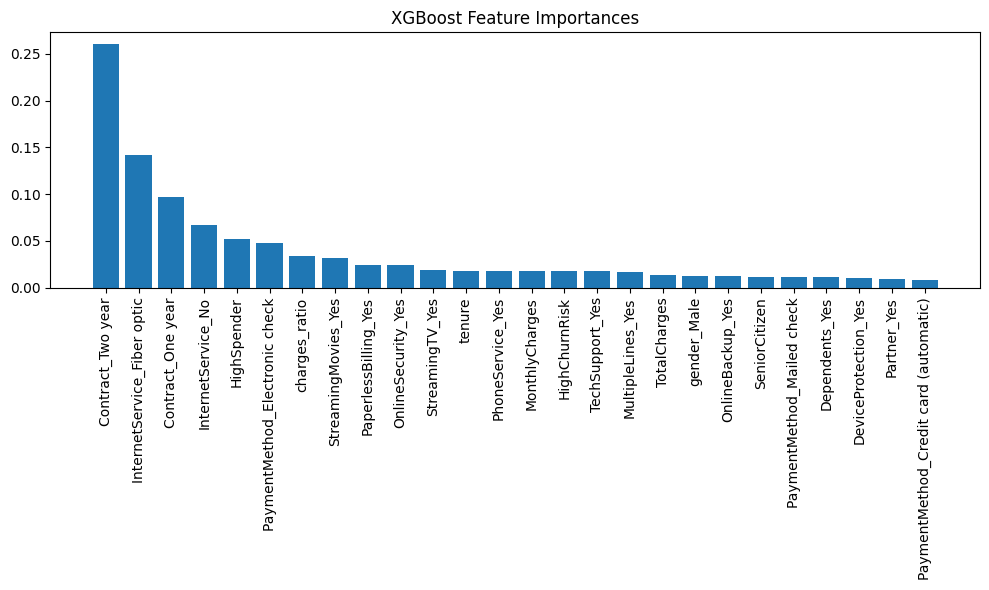

In [1]:
import os
import sys
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

# Set up project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Load model evaluation functions
from src.model_training import (
    evaluate_model,
    plot_confusion_matrices,
    plot_roc_curves,
    plot_feature_importance
)

# Define the directory where models are saved
models_dir = os.path.join(project_root, "data", "models")
_model_files = {
    'Logistic Regression': "logistic_regression.pkl",
    'Random Forest': "random_forest.pkl",
    'Decision Tree': "decision_tree.pkl",
    'XGBoost': "xgboost.pkl"
}

# Load models from the specified directory
models = {}
for name, fname in _model_files.items():
    model_path = os.path.join(models_dir, fname)
    if os.path.exists(model_path):
        models[name] = joblib.load(model_path)
    else:
        raise FileNotFoundError(f"{name} model file not found at {model_path}. Please run the training notebook first.")

# Load the processed data for evaluation
processed_path = os.path.join(project_root, "data", "processed", "telco_churn_processed.csv")
df = pd.read_csv(processed_path)

# Prepare X (features DataFrame) and y (target variable)
X = df.drop(columns=["Churn_Yes", "customerID", "tenure_group"], errors='ignore')
y = df["Churn_Yes"]

# Split the data into training and testing sets (if needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Evaluate models and collect metrics
metrics = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}

# Print evaluation metrics for each model
for name, metric in metrics.items():
    print(f"{name} Metrics:", metric)

# Plot Confusion Matrices for all models
plot_confusion_matrices(models, X_test, y_test)

# Plot ROC Curves for all models
plot_roc_curves(models, X_test, y_test)

# Plot Feature Importance for tree-based models
plot_feature_importance(models, X)
